In [3]:
import numpy as np
import pandas as pd

In [4]:
features = ['checking account balance', 'duration', 'credit history',
            'purpose', 'amount', 'savings', 'employment', 'installment',
            'marital status', 'other debtors', 'residence time',
            'property', 'age', 'other installments', 'housing', 'credits',
            'job', 'persons', 'phone', 'foreign']
target = 'repaid'
df = pd.read_csv('german.data', sep=' ',
                     names=features+[target])

In [5]:
df.head()

,checking account balance,duration,credit history,purpose,amount,savings,employment,installment,marital status,other debtors,...,property,age,other installments,housing,credits,job,persons,phone,foreign,repaid
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking account balance    1000 non-null object
duration                    1000 non-null int64
credit history              1000 non-null object
purpose                     1000 non-null object
amount                      1000 non-null int64
savings                     1000 non-null object
employment                  1000 non-null object
installment                 1000 non-null int64
marital status              1000 non-null object
other debtors               1000 non-null object
residence time              1000 non-null int64
property                    1000 non-null object
age                         1000 non-null int64
other installments          1000 non-null object
housing                     1000 non-null object
credits                     1000 non-null int64
job                         1000 non-null object
persons                     1000 non-null int64
phone              

In [7]:
import matplotlib.pyplot as plt
numerical_features = ['duration', 'age', 'residence time', 'installment', 'amount', 'duration', 'persons', 'credits']
quantitative_features = list(filter(lambda x: x not in numerical_features, features))
X = pd.get_dummies(df, columns=quantitative_features, drop_first=True)
encoded_features = list(filter(lambda x: x != target, X.columns))

In [8]:
X.head()

,duration,amount,installment,residence time,age,credits,persons,repaid,checking account balance_A12,checking account balance_A13,...,property_A124,other installments_A142,other installments_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192,foreign_A202
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,2,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,2,0,0,...,1,0,1,0,1,0,1,0,0,0


In [9]:
# scale data
norm = 1/X.std()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# split in training and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X*norm, df[target],
            test_size=0.2)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

<ErrorbarContainer object of 3 artists>

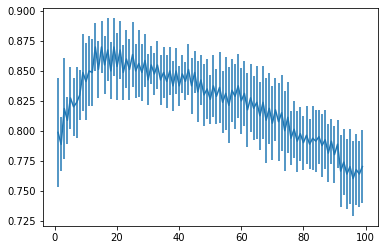

In [15]:
neighbor_ks = range(1, 100)

untrained_models = [KNeighborsClassifier(n_neighbors=k) for k in neighbor_ks]
k_fold_scores = [cross_val_score(estimator=m, X=Xtrain, y=ytrain, cv=10) for m in untrained_models]

mean_xv_scores = [s.mean() for s in k_fold_scores]

plt.errorbar(neighbor_ks, mean_xv_scores, yerr=[s.std() for s in k_fold_scores])